## 데이터, 라이브러리 선언

In [80]:
import pandas as pd
import numpy as np
import urllib.request
import re
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt

In [23]:
data_url = "https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData.csv"
urllib.request.urlretrieve(data_url, filename="data.csv")

('data.csv', <http.client.HTTPMessage at 0x2e4291640>)

In [24]:
data = pd.read_csv('../data/data.csv')
print(data.shape)
data.head()

(11823, 3)


,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [25]:
hub = pd.read_csv("../data/aihub_conversation_data.csv")
print(hub.shape)
hub.head(10)

(1558758, 2)


,Q,A
0,요즘 동물들을 유기 하는 애들도 참 문제야 ㅠㅠ,동물들을 유기 하는 사람이 아직도 있어?
1,동물들을 유기 하는 사람이 아직도 있어?,그치 동물들도 요즘 사회적 이슈고 요즘 또 이슈화 있는 사건이 많더라고
2,그치 동물들도 요즘 사회적 이슈고 요즘 또 이슈화 있는 사건이 많더라고,우리 원룸 주변에 보면 아직도 길고양이들 돌아다니고 하더라고 ㅠㅠ
3,우리 원룸 주변에 보면 아직도 길고양이들 돌아다니고 하더라고 ㅠㅠ,고양이도 소중한 생명인데 길거리에 버려진 고양이들 보면 너무 안타까워
4,고양이도 소중한 생명인데 길거리에 버려진 고양이들 보면 너무 안타까워,이 알레르기 있어서 만지지도 못하고 안타깝다 정말 귀여운데
5,**이 알레르기 있어서 만지지도 못하고 안타깝다 정말 귀여운데,다 벌 받을 거야 나쁜 사람들 ㅠ
6,다 벌 받을 거야 나쁜 사람들 ㅠ,요즘 사회적 이슈들은 뭐가 있을까?
7,요즘 사회적 이슈들은 뭐가 있을까?,아무래도 가장 큰 건 코로나 아닐까?
8,아무래도 가장 큰 건 코로나 아닐까?,며칠 전에 3200명이란 어마어마한 확진자가 발생했잖아
9,며칠 전에 3200명이란 어마어마한 확진자가 발생했잖아,코로나가 제일 심각한 문제긴 하지 우리나라 뿐만 아니라 전 세계적으로 문제가 있는 거라


## 데이터 전처리

In [26]:
hub = hub.dropna()
hub.isnull().sum()

Q    0
A    0
dtype: int64

In [27]:
Q = []
A = []

In [28]:
# 구두점을 제거하지 않고 띄어쓰기 처리
for sentence in data["Q"]:
    sentence = re.sub(r"([?!,.~])", r" \1 ", sentence)
    sentence = re.sub("\*+", "", sentence)
    sentence = sentence.strip()
    Q.append(sentence)

for sentence in hub["Q"]:
    sentence = re.sub(r"([?!,.~])", r" \1 ", sentence)
    sentence = re.sub("\*+", "", sentence)
    sentence = sentence.strip()
    Q.append(sentence)

for sentence in data["A"]:
    sentence = re.sub(r"([?!,.~])", r" \1 ", sentence)
    sentence = re.sub("\*+", "", sentence)
    sentence = sentence.strip()
    A.append(sentence)

for sentence in hub["A"]:
    sentence = re.sub(r"([?!,.~])", r" \1 ", sentence)
    sentence = re.sub("\*+", "", sentence)
    sentence = sentence.strip()
    A.append(sentence)

KeyboardInterrupt: 

In [ ]:
print(len(Q), len(A))
print(Q[:5])
print(A[:5])

1552870 1552870
['12시 땡 !', '1지망 학교 떨어졌어', '3박4일 놀러가고 싶다', '3박4일 정도 놀러가고 싶다', 'PPL 심하네']
['하루가 또 가네요 .', '위로해 드립니다 .', '여행은 언제나 좋죠 .', '여행은 언제나 좋죠 .', '눈살이 찌푸려지죠 .']


## 토큰화

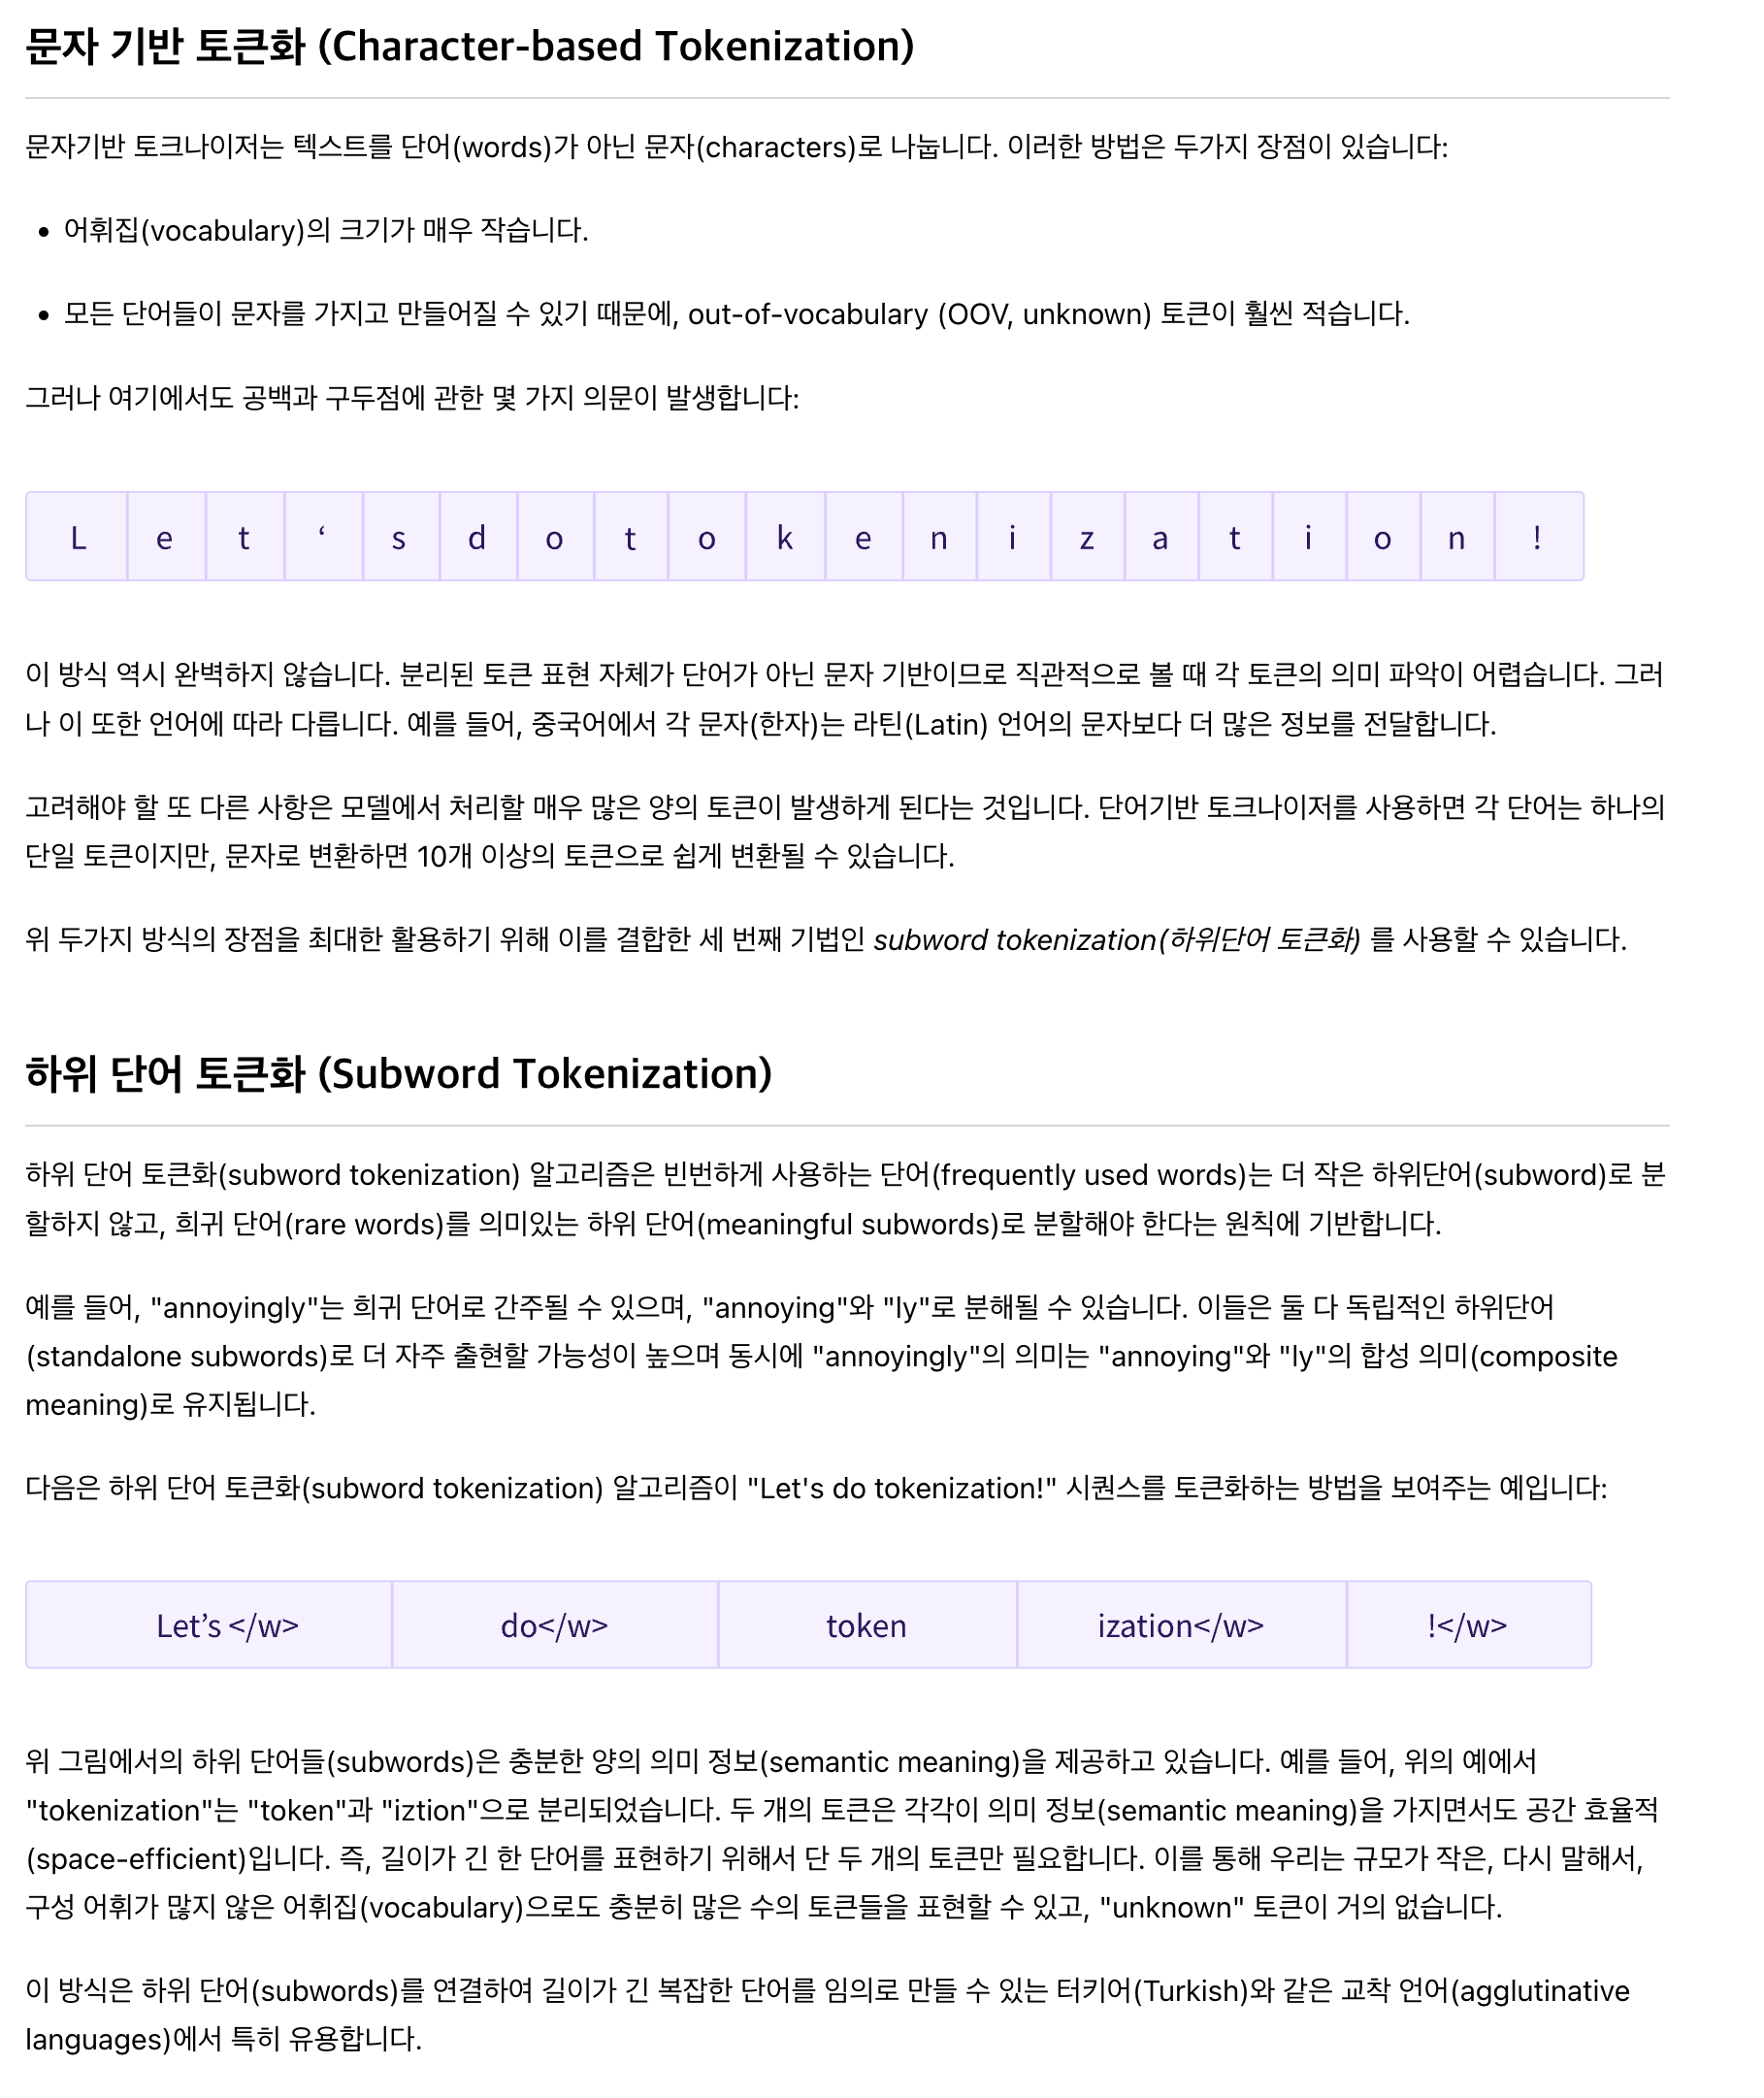
[출처](https://wikidocs.net/166796)

[tfds.deprecated.text.SubwordTextEncoder 공식 문서](https://www.tensorflow.org/datasets/api_docs/python/tfds/deprecated/text/SubwordTextEncoder#methods)

In [ ]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(Q + A, target_vocab_size=2**16)

In [ ]:
print(tokenizer.subwords[:100])

[' ?', '키키', '키키_', ' .', ' ?  ', '거_', '안_', '진짜_', ' .  .  .', ' .  .  .  ', ' !', '아_', '너무_', '도_', '나도_', '나는_', '나_', '많이_', 'ㅠㅠ', '다_', '근데_', '잘_', '맞아_', '는_', '응_', '난_', '것_', ' .  ', '좀_', '게_', '그_', '같아', '하하', '가_', '더_', '한_', '이_', '그런_', ' ,  ', '그럼_', '엄청_', '수_', '그냥_', '은_', '고_', ' ~', '그거_', '있어', '그래도_', '요즘_', '때_', '하는_', '우리_', '그래서_', '을_', '할_', '하고_', ' !  ', '내가_', '에_', '해', '오_', '요', '왜_', '뭐_', '못_', '만_', '거야', '아니_', '같이_', '또_', '면_', '내_', 'ㅜㅜ', '지_', '지금_', '를_', '정말_', '서_', '지', '그래', '있는_', '이제_', 'ㅠㅠ_', '건_', '좋은_', '맞아', ' ~  ', '그렇게_', '그래_', '한번_', '와_', '랑_', 'ㅠ', '너_', '로_', '무슨_', '그건_', '진짜', '야']


In [45]:
len(tokenizer.subwords)

65058

In [46]:
# 단어장 크기
tokenizer.vocab_size

65315

In [47]:
# SOS, EOS 토큰에 정수 부여 
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# 단어장에 SOS, EOS 토큰이 추가된 것을 감안하여 + 2
VOCAB_SIZE = tokenizer.vocab_size + 2

print('시작 토큰 번호 :',START_TOKEN)
print('종료 토큰 번호 :',END_TOKEN)
print('단어 집합의 크기 :',VOCAB_SIZE)

시작 토큰 번호 : [65315]
종료 토큰 번호 : [65316]
단어 집합의 크기 : 65317


In [48]:
# 최대 길이를 40으로 정의
MAX_LENGTH = 40

# Q, A에 대하여 토큰화 수행
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []

    # Q, A를 순회
    for (sentence1, sentence2) in zip(inputs, outputs):
      # 인코딩
      sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
      sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

      tokenized_inputs.append(sentence1)
      tokenized_outputs.append(sentence2)

    # 길이 40에 맞춰 패딩
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

    # 인코딩 + 패딩 결과 값 반환
    return tokenized_inputs, tokenized_outputs

In [49]:
questions, answers = tokenize_and_filter(Q, A)

In [50]:
print('질문 데이터의 크기(shape) :', questions.shape)
print('답변 데이터의 크기(shape) :', answers.shape)

질문 데이터의 크기(shape) : (611111, 40)
답변 데이터의 크기(shape) : (611111, 40)


## 샘플 디코딩

In [51]:
# 인코딩 + 패딩 샘플
print(questions[13])
print(answers[13])

[65315  5663  4372 14893   641 65316     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
[65315  4372    77  7472   671     4 65316     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


In [76]:
EOS_q_idx = np.where(questions[13] == END_TOKEN)[0][0]
EOS_a_idx = np.where(answers[13] == END_TOKEN)[0][0]
EOS_q_idx, EOS_a_idx

(5, 6)

In [77]:
print(tokenizer.decode(questions[13][1:EOS_q_idx]))
print(tokenizer.decode(answers[13][1:EOS_a_idx]))

가끔은 혼자인게 좋다
혼자를 즐기세요 .


## 모델링